In [1]:
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import dask as ds
from cdo import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

%matplotlib inline

#!jupyter nbextension enable code_prettify/autopep8

In [2]:
# using cdo python bindings to create ensemble means of different model realizations

cdo   = Cdo() 

ifile_aer = ['/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r2i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r3i1p1f1_gr_201401-204312.nc',
             '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r4i1p1f1_gr_201401-204312.nc'
             ]

outfile_aer = '/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc'            
             
#cdo.ensmean(input=ifile_aer, output=outfile_aer)      

#print(cdo.ensmean(input=ifile_aer,returnCdf=True).variables)  

In [3]:
MPI_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc",
           "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_MPI-ESM1-2-LR_piClim-spAer-aer_r123i1p1f1_gn_184901-187912.nc")

MPI_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc",
               "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_MPI-ESM1-2-LR_piClim-control_r123i1p1f1_gn_184901-187912.nc"
                )
NorESM_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc",
              "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_NorESM2-LM_piClim-spAer-aer_r1i1p1f1_gn_000101-003012.nc"
             )

NorESM_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc",
                  "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_NorESM2-LM_piClim-control_r1i1p1f1_gn_000101-003012.nc"
                 )
IPSL_aer = ("/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsut/rsut_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlut/rlut_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rsutcs/rsutcs_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/rlutcs/rlutcs_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc",
            "/data/aero/CMIP6/RFMIP/piClim-spAer-aer/clt/clt_Amon_IPSL-CM6A-LR_piClim-spAer-aer_r1234i1p1f1_gr_201401-204312.nc"
           )

IPSL_control = ("/data/aero/CMIP6/RFMIP/piClim-control/rsdt/rsdt_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rsut/rsut_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rlut/rlut_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rsutcs/rsutcs_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/rlutcs/rlutcs_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc",
                "/data/aero/CMIP6/RFMIP/piClim-control/clt/clt_Amon_IPSL-CM6A-LR_piClim-control_r1234i1p1f1_gr_201401-204312.nc"
               )

In [4]:
# Read all files and merge them

MPI_data_aer = xr.open_mfdataset(MPI_aer, parallel=True)
MPI_data_control = xr.open_mfdataset(MPI_control, parallel=True)

NorESM_data_aer = xr.open_mfdataset(NorESM_aer, parallel=True)
NorESM_data_control = xr.open_mfdataset(NorESM_control, parallel=True)

IPSL_data_aer = xr.open_mfdataset(IPSL_aer, parallel=True)
IPSL_data_control = xr.open_mfdataset(IPSL_control, parallel=True)

In [5]:
def compute_forcings_allsky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''
    
    sw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsut"]
    sw_balance_control = data_control["rsdt"] - data_control["rsut"]
    sw_forcing_toa = -sw_balance_control + sw_balance_aer
    lw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsut"] - data_aerosols["rlut"]
    lw_balance_control = data_control["rsdt"] - data_control["rsut"] - data_control["rlut"]
    lw_forcing_toa = -lw_balance_control + lw_balance_aer

    return sw_forcing_toa, lw_forcing_toa

In [6]:
def compute_forcings_clearsky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''
    
    sw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsutcs"]
    sw_balance_control = data_control["rsdt"] - data_control["rsutcs"]
    sw_forcing_toa = -sw_balance_control + sw_balance_aer
    lw_balance_aer = data_aerosols["rsdt"] - data_aerosols["rsutcs"] - data_aerosols["rlutcs"]
    lw_balance_control = data_control["rsdt"] - data_control["rsutcs"] - data_control["rlutcs"]
    lw_forcing_toa = -lw_balance_control + lw_balance_aer

    return sw_forcing_toa, lw_forcing_toa

In [7]:
def compute_cloudy_sky(data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer

       Returns:
       --------
       sw_forcing_toa: xarray.DataArray
                       shortwave forcing at toa; same dimension as input data (usually (time, lat, lon))
       lw_forcing_toa: xarray.DataArray
                       longwave forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''
    
    forcing_allsky = compute_forcings_allsky(data_aerosols, data_control)
    forcing_clearsky = compute_forcings_clearsky(data_aerosols, data_control)
    
    a = forcing_allsky[0] - (1- data_aerosols["clt"]*0.01) * forcing_clearsky[0]
    a1 = forcing_allsky[0] - (1- data_control["clt"]*0.01) * forcing_clearsky[0]
    a2 = forcing_allsky[1] - (1- data_aerosols["clt"]*0.01) * forcing_clearsky[1]
    a3 = forcing_allsky[1] - (1- data_control["clt"]*0.01) * forcing_clearsky[1]
    
    deno1 = data_aerosols["clt"].values *0.01
    deno2 = data_control["clt"].values *0.01
    
    deno1[deno1 <0.01] = 0 #xarray equivalent: deno1.where(deno1 < 0.01, 0)
    deno2[deno2 <0.01] = 0 #xarray equivalent: deno2.where(deno2 < 0.01, 0)
    
    #haven't found an xarray equivalent of np.divide
    sw_cloudy_aer = np.divide(a.values, deno1, out=np.zeros_like(a.values), where=(deno1 !=0))
    sw_cloudy_control = np.divide(a1.values, deno2, out=np.zeros_like(a1.values), where=(deno2!=0))
    lw_cloudy_aer = np.divide(a2.values,deno1, out=np.zeros_like(a2.values), where=(deno1!=0))
    lw_cloudy_control = np.divide(a3.values, deno2, out=np.zeros_like(a3.values), where=(deno2!=0))
    
    return sw_cloudy_control, sw_cloudy_aer, lw_cloudy_control, lw_cloudy_aer

In [8]:
def global_mean(data, dtype = 'xarray'):
    ''' Calculate the global mean value of given data with (lat,lon) coordinates
        Parameters:
        -----------

        data: 3D or 2D xarray.DataArray/ numpy.ndarray
              can be forcing, SST, temperature, preciptitation, etc. over a sphere. 
              For 2D ndarray, axis has to be changed to 0
        dtype: data type. Default: "xarray". 
               can be either an xarray.Datarray or a numpy ndarray only

        Returns:
        --------
        area_mean: 1D xarray.DataArray/ numpy.ndarray
                   area mean
        global_mean: float64
                     spatial and/or temporal mean
    '''
    if dtype == "xarray":
        weight = np.cos(np.deg2rad(data.lat))
        area_mean = data.weighted(weight).mean(dim=("lon", "lat"))
        global_mean = area_mean.mean().values
    else:
        weight = np.cos(np.deg2rad(data.lat.values))
        area_mean = np.average(data.values,axis=1, weights=weight)
        global_mean = area_mean.mean()
    
    return (area_mean, global_mean)

In [9]:
def time_series(data,variable, grid_dist = 1.0, plot=True):
    ''' Compute the time-series for any given variable of interest with (lat,lon) coordinates
        Taken from: https://github.com/pangeo-data/pangeo-tutorial/blob/agu2019/notebooks/xarray.ipynb#More-Complicated-Example:-Weighted-Mean
    Parameters:
    -----------
    data:      xarray.Dataset
               usually: dim=(time, lat, lon) and contains several variables of interest such as temperature etc.
          
    variable: 3D or 2D xarray.DataArray
               can be forcing, SST, temperature, preciptitation, etc. over a sphere
   
    grid_dist: float64
               distance between the grid points. Default = 1.0
               
    Returns:
    --------
    weighted_mean: 1D xarray.DataArray
                   returns the weighted time series data of the variable of interest 
                   by calculating the total spherical area and points on the map where the variable is not zero.
                   where ϕ is latitude, dϕ is the spacing of the points in latitude, 
                   dλ is the spacing of the points in longitude, and R is Earth's radius. 
     
    plot:      boolean
               plots time series data if True. Default = True
    '''
    
    R = 6.37e6
    dϕ = np.deg2rad(grid_dist) 
    dλ = np.deg2rad(grid_dist)
    dA = R**2 * dϕ * dλ * np.cos(np.deg2rad(data.lat))
    
    pixel_area = dA.where(variable[0].notnull())
    total_area = pixel_area.sum(dim=('lon', 'lat'))
    weighted_mean = (variable * pixel_area).sum(dim=('lon', 'lat')) / total_area
    
    if plot is True:
        weighted_mean.plot()
    
    return weighted_mean

In [73]:
def plot_data(dataset, data_var, dtype= "ndarray",ticks=None, colors=None, levels=None, title = None, figname= None):
    
    if dtype == "ndarray":
        vmax = np.max(np.mean(data_var,axis=0))
        vmin = np.min(np.mean(data_var,axis=0))
        var = data_var
    else:
        vmax = np.max(np.mean(data_var,axis=0))
        vmin = np.min(np.mean(data_var,axis=0))     #(data_var.mean("year").values)
        var = data_var.values
        
    v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] ) 
    norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) 
    cmap = cm.get_cmap('RdBu_r', 20)
    
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
    ax.set_global()
    ax.coastlines()
    val, ll = add_cyclic_point(var, coord = dataset.lon.values) 
    
    if colors is not None:
        cs = ax.contourf(ll, dataset.lat.values ,np.mean(val,axis=0),norm=norm, transform=ccrs.PlateCarree(),colors=colors,levels=levels,extend='both')
        plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=ticks)
        cs.cmap.set_under("#053061")
        cs.cmap.set_over("#67001f")

    else: 
        cs = ax.contourf(ll, dataset.lat.values,np.mean(val,axis=0),norm=norm, transform=ccrs.PlateCarree(),cmap='RdBu_r')
        plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
    
    if title is not None:
        plt.title(title, loc='left', fontsize = 12)
    
    if figname is not None:
        plt.savefig(figname + ".pdf", bbox_inches='tight', transparent=True)
    
    return cs

In [74]:
def plot_annual_data(dataset, data_var, dtype= "ndarray",ax= None,ticks=None, colors=None, levels=None, title = None, figname= None):
    
    if dtype == "ndarray":
        vmax = np.max(data_var)
        vmin = np.min(data_var)
        var = data_var
    else:
        vmax = np.max(data_var.values)
        vmin = np.min(data_var.values)
        var = data_var.values
        
    v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] ) 
    norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) 
    cmap = cm.get_cmap('RdBu_r', 20)
    
    ax.set_global()
    ax.coastlines()
    val, ll = add_cyclic_point(var, coord = data_var.lon.values) 
    
    if colors is not None:
        cs = ax.contourf(ll, data_var.lat.values, val,norm=norm, transform=ccrs.PlateCarree(),colors=colors,levels=levels,extend='both')
        cs.cmap.set_under("#053061")
        cs.cmap.set_over("#67001f")
    else: 
        cs = ax.contourf(ll, data_var.lat.values, val,norm=norm, transform=ccrs.PlateCarree(),cmap='RdBu_r')
        
    if title is not None:
        plt.title(title, loc='left', fontsize = 12)
    
    if figname is not None:
        plt.savefig(figname + ".pdf", bbox_inches='tight', transparent=True)
    
    return cs

In [15]:
forcing_Nor = compute_cloudy_sky(data_aerosols=NorESM_data_aer, data_control=NorESM_data_control)
forcing_MPI = compute_cloudy_sky(data_aerosols=MPI_data_aer, data_control=MPI_data_control)
forcing_IPSL = compute_cloudy_sky(data_aerosols=IPSL_data_aer, data_control=IPSL_data_control)

In [16]:
# global mean for above

In [17]:
forcing_Nor_all = compute_forcings_allsky(data_aerosols=NorESM_data_aer, data_control=NorESM_data_control)
forcing_MPI_all = compute_forcings_allsky(data_aerosols=MPI_data_aer, data_control=MPI_data_control)
forcing_IPSL_all = compute_forcings_allsky(data_aerosols=IPSL_data_aer, data_control=IPSL_data_control)

In [18]:
ticks = [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10]
colors1 = ['#053061','#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white',  '#fae7dc','#fac7ae','#ec9274','#cf5347','#ab162a']
levels = [-12,-10,-8,-6,-4,-2,-0.5,0.5,2,4,6,8,10]

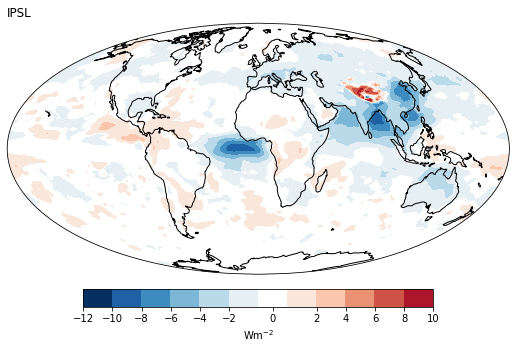

In [21]:
#a = plot_data(NorESM_data_aer, forcing_Nor_all[0], dtype="xarray", ax=ax, ticks=ticks, colors=colors, levels=levels, title="NCC")
#b = plot_data(MPI_data_aer, forcing_MPI_all[0], dtype="xarray",ax=ax, ticks=ticks, colors=colors, levels=levels, title="MPI")
c = plot_data(IPSL_data_aer, forcing_IPSL_all[0], dtype="xarray", ticks=ticks, colors=colors1,levels=levels, title="IPSL")

In [23]:
ds = forcing_Nor_all[0]
ds_new = ds.groupby('time.year').mean(dim='time')
ds_new

,Array,Chunk
Bytes,1.66 MB,55.30 kB
Shape,"(30, 96, 144)","(1, 96, 144)"
Count,132 Tasks,30 Chunks
Type,float32,numpy.ndarray


In [ ]:
#def annual_mean

In [25]:
ds = forcing_Nor_all[0]
ds_new = ds.groupby('time.year').mean(dim='time')

ds1 = forcing_MPI_all[0]
ds1_new = ds1.groupby('time.year').mean(dim='time')

ds2 = forcing_IPSL_all[0]
ds2_new = ds2.groupby('time.year').mean(dim='time')

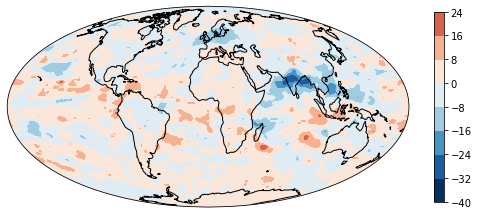

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,7), subplot_kw=dict(projection=ccrs.Mollweide()))
im = plot_annual_data(NorESM_data_aer, ds_new[29], dtype= 'xarray', ax=axes)
plt.colorbar(im, ax=axes, shrink=0.5)
plt.show()

In [75]:
from pylab import *

cmap = cm.get_cmap('RdBu_r', 2)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#053061
#67001f


In [71]:
ticks1 = [-20,-16,-12,-8,-4,0,4,8,12,16,20] 
colors = ["#1e61a5","#3d8bbf","#7cb7d7","#bad9e9","#e6eff4","white","#faeae1","#fac7ae","#ec9274","#cf5347","#ab162a"]
levels1 = [-20,-16,-12,-8,-4,-1,1,4,8,12,16,20]

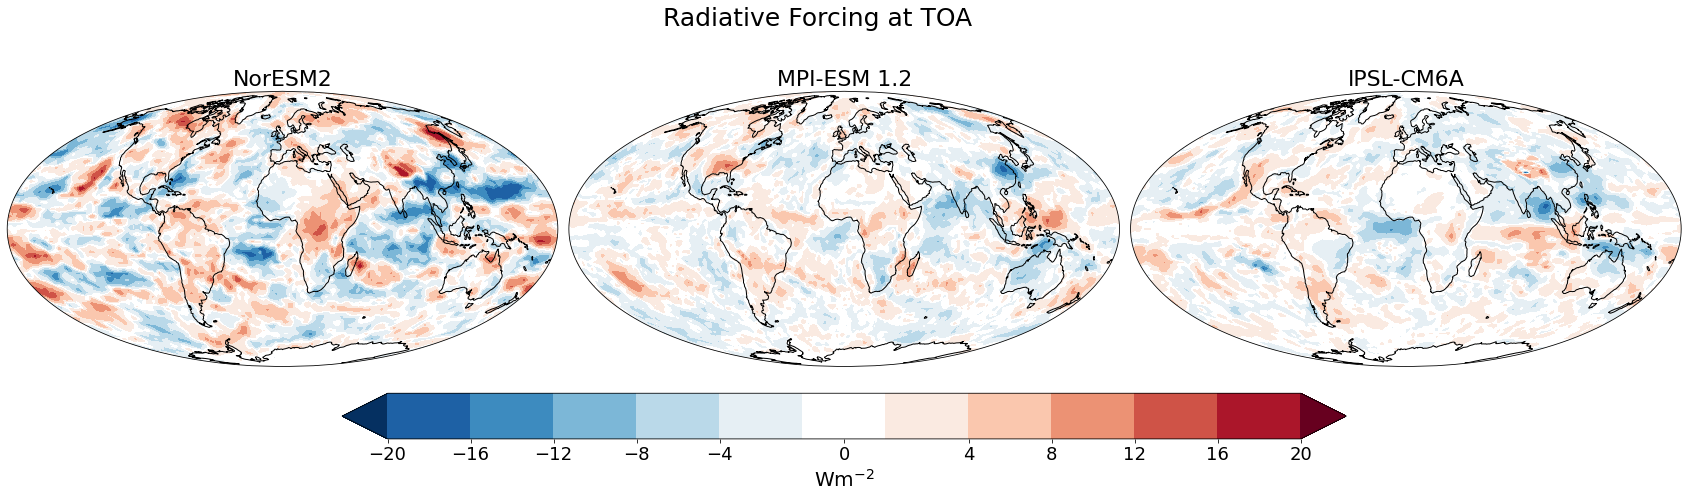

In [144]:
data = [ds_new, ds1_new, ds2_new]
data_main = [NorESM_data_aer, MPI_data_aer, IPSL_data_aer]
labels = ["NorESM2", "MPI-ESM 1.2", "IPSL-CM6A"]
fig, axes = plt.subplots(ncols=3, figsize=(30,25), subplot_kw=dict(projection=ccrs.Mollweide()))

#for i in range(27,30): #ds_new.shape[0]
for data, data_main,labels, ax in zip(data,data_main,labels,axes):
    im = plot_annual_data(data_main ,data[24] ,dtype="xarray", ax=ax, ticks=ticks1, colors=colors, levels=levels1)
    ax.set_title(labels, fontsize=22)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), ticks=ticks1, orientation='horizontal',fraction=0.04,shrink = 0.6)
cbar.set_label(label=r"$\mathrm{Wm}^{-2}$", size=20)
cbar.ax.tick_params(labelsize=18) 
fig.subplots_adjust(wspace=0.02, bottom=0.17)
fig.suptitle('Radiative Forcing at TOA', x= 0.50, y= 0.37, fontsize=25)
#plt.savefig("subplot_test_" +str(25)+".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show() #0,1, 16-1, 20-0.15, 21-0.2, 22,23,24,25-1,26-0.5,27...1 